In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using Polyhedra, CDDLib
using Colors: distinguishable_colors
using ForwardDiff

In [115]:
include("explicit_network.jl")

ExNet

In [116]:
weights = [[1. 0; 0 1], [1. 2]']
biases = [[0, 0], [0]]
net = ExNet.Net(weights, biases)

bounds = hrep(polyhedron(SimpleVRepresentation([-1. -1; -1 1; 1 1; 1 -1]), CDDLibrary()))

H-representation
begin
 4 3 real
 1.0 0.0 1.0
 1.0 1.0 0.0
 1.0 0.0 -1.0
 1.0 -1.0 0.0
end

In [117]:
ExNet.feedforward(net, [1, 1])

3-element Array{Float64,1}:
 1.0
 1.0
 3.0

In [118]:
results = ExNet.explore(net, bounds, [1., 1])

Dict{BitArray{1},Polyhedra.SimpleHRepresentation{2,Float64}} with 4 entries:
  Bool[false,true]  => H-representation…
  Bool[true,false]  => H-representation…
  Bool[true,true]   => H-representation…
  Bool[false,false] => H-representation…


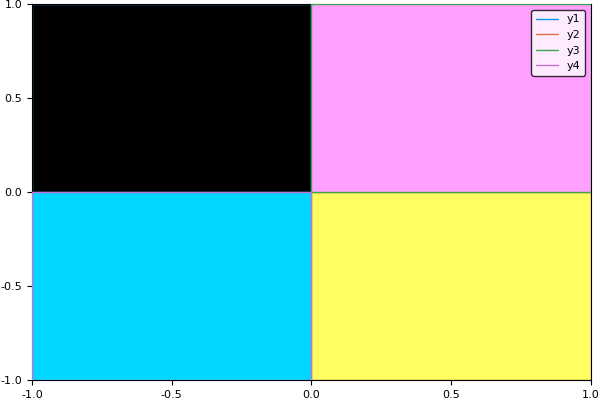

In [119]:
colors = distinguishable_colors(length(results))
plt = plot(xlim=(-1, 1), ylim=(-1, 1))
for (i, (state, p)) in enumerate(results)
    V = SimpleVRepresentation(vrep(polyhedron(p, CDDLibrary()))).V
    plot!(plt, V[[1:end; 1], 1], V[[1:end; 1], 2], fill=(0, colors[i]))
end
plt


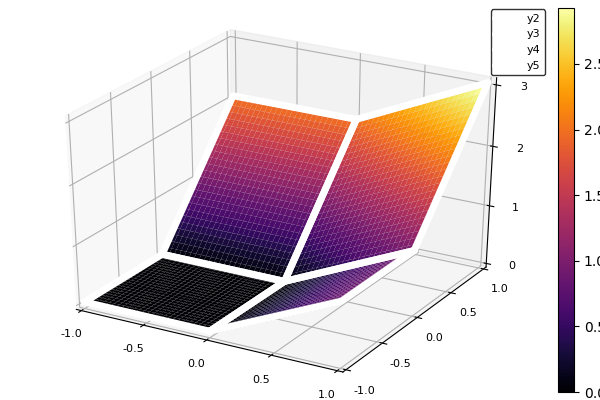

In [120]:
xx = linspace(-1, 1)
yy = linspace(-1, 1)
plt = surface(xx, yy, (x, y) -> ExNet.feedforward(net, [x, y])[end])
for (i, (state, p)) in enumerate(results)
    V = SimpleVRepresentation(vrep(polyhedron(p, CDDLibrary()))).V
    x = V[[1:end; 1], 1]
    y = V[[1:end; 1], 2]
    plot!(plt, x, y, [ExNet.feedforward(net, [x[i], y[i]])[end]+0.05 for i in eachindex(x)], linecolor=:white, linewidth=5)
end
plt